## Exploring the data 

In [1]:
import pandas as pd

df = pd.read_csv("./data/student_exam_data.csv")
df.head()

Study Hours  Previous Exam Score  Pass/Fail
0     4.370861            81.889703          0
1     9.556429            72.165782          1
2     7.587945            58.571657          0
3     6.387926            88.827701          1
4     2.404168            81.083870          0

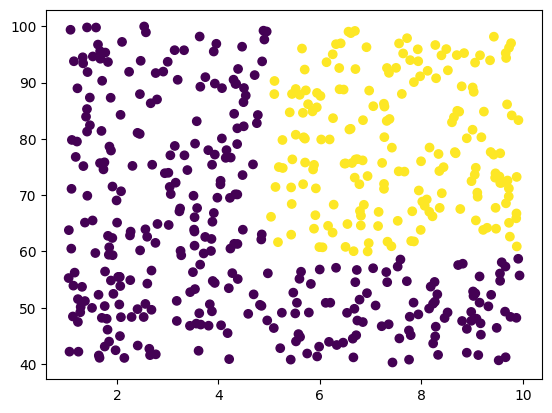

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df["Study Hours"], df["Previous Exam Score"], c=df["Pass/Fail"])
plt.show()

## First Network

In [3]:
import sys
import torch
from torch import nn
import pandas as pd

df = pd.read_csv("./data/student_exam_data.csv")

X = torch.tensor(
    df[["Study Hours", "Previous Exam Score"]].values, 
    dtype=torch.float32
)
y = torch.tensor(df["Pass/Fail"], dtype=torch.float32).reshape((-1, 1))




In [4]:

hidden_model = nn.Linear(2, 10)
output_model = nn.Linear(10, 1)
loss_fn = torch.nn.BCEWithLogitsLoss()
parameters = list(hidden_model.parameters()) + list(output_model.parameters())
optimizer = torch.optim.SGD(parameters, lr=0.005)


In [5]:

for i in range(0, 500000):
    optimizer.zero_grad()
    # first step : sum
    outputs = hidden_model(X)
    # second step : sigmoid
    outputs = nn.functional.sigmoid(outputs)
    # third stwp : output
    outputs = output_model(outputs)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()

    if i % 10000 == 0:
        print(loss)

tensor(0.7453, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4863, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4536, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4419, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4349, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4295, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4247, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4199, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4151, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4102, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4048, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4073, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4290, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4315, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4321, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4316, grad_fn=<BinaryCrossEntro

SystemExit: 

C:\Users\ibrah\Desktop\pytorch\env\Lib\site-packages\IPython\core\interactiveshell.py:3675: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [6]:

hidden_model.eval()
output_model.eval()
with torch.no_grad():
    outputs = hidden_model(X)
    outputs = nn.functional.sigmoid(outputs)
    outputs = output_model(outputs)
    y_pred = nn.functional.sigmoid(outputs) > 0.5
    y_pred_correct = y_pred.type(torch.float32) == y
    print(y_pred_correct.type(torch.float32).mean())

tensor(0.8280)


## Sequential model

In [8]:

model = nn.Sequential(
    nn.Linear(2, 10),
    nn.Sigmoid(),
    nn.Linear(10, 1)
)

In [10]:

loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)


In [11]:

for i in range(0, 500000):
    optimizer.zero_grad()
    outputs = model(X)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()

    if i % 10000 == 0:
        print(loss)

tensor(0.7356, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6579, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6579, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6579, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6579, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6579, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6579, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6579, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6579, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6579, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6579, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6579, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6579, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6579, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6579, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6579, grad_fn=<BinaryCrossEntro

In [12]:


model.eval()
with torch.no_grad():
    outputs = model(X)
    y_pred = nn.functional.sigmoid(outputs) > 0.5
    y_pred_correct = y_pred.type(torch.float32) == y
    print(y_pred_correct.type(torch.float32).mean())


tensor(0.7620)


## Using Relu

In [14]:

model = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

In [15]:

loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)


In [16]:

for i in range(0, 500000):
    optimizer.zero_grad()
    outputs = model(X)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()

    if i % 10000 == 0:
        print(loss)

tensor(4.2319, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.2842, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.2132, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.1754, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.1449, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.1251, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0812, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0715, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0904, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0923, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0569, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0521, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0508, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0453, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0435, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0518, grad_fn=<BinaryCrossEntro

In [17]:


model.eval()
with torch.no_grad():
    outputs = model(X)
    y_pred = nn.functional.sigmoid(outputs) > 0.5
    y_pred_correct = y_pred.type(torch.float32) == y
    print(y_pred_correct.type(torch.float32).mean())


tensor(1.)


## Mini Batch training

In [18]:

num_entries = X.size(0) # number of samples
batch_size = 32


In [19]:
for i in range(0, 1000):
    for start in range(0, num_entries, batch_size):
        end = min(num_entries, start + batch_size)
        X_data = X[start:end]
        y_data = y[start:end]

        optimizer.zero_grad()
        outputs = model(X_data)
        loss = loss_fn(outputs, y_data)
        loss.backward()
        optimizer.step()

    if i % 10 == 0:
        print(loss)


tensor(0.0956, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0896, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0945, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0934, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0913, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0893, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0877, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0861, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0842, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0856, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0865, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0880, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0900, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0925, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0952, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0980, grad_fn=<BinaryCrossEntro

In [20]:

model.eval()
with torch.no_grad():
    outputs = model(X)
    y_pred = nn.functional.sigmoid(outputs) > 0.5
    y_pred_correct = y_pred.type(torch.float32) == y
    print(y_pred_correct.type(torch.float32).mean())


tensor(0.9420)
